# 确定晶格的第一布里渊区 (计算能带时需要自己确定 `KPATH`)

# 0. `numpy` 中的三种乘法

## 0.1. 星乘 (`*`)
1. 数组星乘，就是数组的对应元素相乘
2. 即使两个数组的shape不一样，只要满足特定条件，同样可以用星号相乘，且满足交换律。

In [1]:
import numpy as np

### shape 相同的 array 的星乘 -- 一维
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
a * b

array([ 4, 10, 18])

In [3]:
### shape 相同的 array 的星乘 -- 多维
a = np.arange(6).reshape( (2, 3) )
b = np.arange(6, 12).reshape( (2, 3) )
print(a)
print(b)
print(a * b)

[[0 1 2]
 [3 4 5]]
[[ 6  7  8]
 [ 9 10 11]]
[[ 0  7 16]
 [27 40 55]]


In [4]:
### shape 不同的 array 的星乘
a = np.arange(6).reshape((2,3))
b = np.array([1,2,3])
print(a)
print(b)
print(a * b)

[[0 1 2]
 [3 4 5]]
[1 2 3]
[[ 0  2  6]
 [ 3  8 15]]


## 0.2. 点乘 (`np.dot()`)
1. 在数学上，向量点乘就是两个向量的对应位相乘后求和，因此向量点乘`得到的是标量`。
$$\begin{aligned}
\vec{a} = \left[ a_1, a_2, ..., a_n \right] \\
\vec{b} = \left[ b_1, b_2, ..., b_n \right] \\
\vec{a}\cdot\vec{b} = a_1b_1 + a_2b_2 + ... + a_nb_n = |\vec{a}||\vec{b}|\cos{\theta}
\end{aligned}$$
2. 对于多维数组，则需要满足一定条件才能实现点乘，且其结果不再是标量，而是一个多维数组。比如，NumPy的矩阵相乘，就是`二维数组的点乘`，参与点乘的`第一个数组的列数必须等于第二个数组的行数`。

In [6]:
### 向量的点乘
a = np.array([1, 2, 3])
b = np.array([1, 2, 3])
print( np.dot(a, b) )

14


In [8]:
### 多维数组 (矩阵) 的点乘
a = np.arange(6).reshape((2,3))
b = np.arange(6,18).reshape((3,4))
c = np.dot(a,b)

print(a)
print(b)
print(c)

[[0 1 2]
 [3 4 5]]
[[ 6  7  8  9]
 [10 11 12 13]
 [14 15 16 17]]
[[ 38  41  44  47]
 [128 140 152 164]]


## 0.3. 叉乘
1. 在数学上，二维平面的向量叉乘，其结果是以两个向量为边的菱形的面积

In [10]:
# 平面向量叉乘，其结果是以两个向量为边的菱形的面积
a = np.array([2,0])
b = np.array([2,2])

print( np.cross(a, b) )

4


In [11]:
a = np.array([1,0,0])
b = np.array([0,1,0])
print( np.cross(a,b) )  # x轴叉乘y轴，得到z轴
print( np.cross(b,a) ) # 叉乘交换顺序，得到反向的法向量

[0 0 1]
[ 0  0 -1]


# 1. Reciprocal lattice

## 1.1. Reciprocal lattice for `3D`
1. 已知$\vec{a_1},\vec{a_2},\vec{a_3}$是`real space`的基矢，$\vec{b_1},\vec{b_2},\vec{b_3}$是`k space(reciprocal space)`的基矢
$$\begin{aligned}
\vec{b_1} = 2\pi\frac{\vec{a_2}\times\vec{a_3}}{V} \\
\vec{b_2} = 2\pi\frac{\vec{a_3}\times\vec{a_1}}{V} \\
\vec{b_3} = 2\pi\frac{\vec{a_1}\times\vec{a_2}}{V} 
\end{aligned}$$

### Demo: Reciprocal Lattice of the fcc Structure
1. One may be tempted to use the vectors which point along the edges of the conventional (cubic) unit cell but `they are not primitive translation vectors`. Instead we can choose the vectors which span a primitive unit cell such as:
$$\begin{aligned}
\vec{a_1} = \frac{a}{2} \cdot (\vec{y} + \vec{z}) \\
\vec{a_2} = \frac{a}{2} \cdot (\vec{x} + \vec{z}) \\
\vec{a_3} = \frac{a}{2} \cdot (\vec{x} + \vec{y})
\end{aligned}$$
2. Apply above formula:
$$\begin{aligned}
\vec{b_1} = \frac{8\pi}{a^3} \cdot \vec{a_2} \times \vec{a_3} = \frac{4\pi}{a}\cdot (-\frac{\vec{x}}{2} + \frac{\vec{y}}{2} + \frac{\vec{z}}{2}) \\
\vec{b_2} = \frac{8\pi}{a^3} \cdot \vec{a_3} \times \vec{a_1} = \frac{4\pi}{a}\cdot (\frac{\vec{x}}{2} - \frac{\vec{y}}{2} + \frac{\vec{z}}{2}) \\
\vec{b_3} = \frac{8\pi}{a^3} \cdot \vec{a_1} \times \vec{a_2} = \frac{4\pi}{a}\cdot (\frac{\vec{x}}{2} + \frac{\vec{y}}{2} - \frac{\vec{z}}{2})
\end{aligned}$$

In [16]:
a1 = np.array( [0, 0.5, 0.5] )
a2 = np.array( [0.5, 0, 0.5] )
a3 = np.array( [0.5, 0.5, 0] )

print( np.cross(a2, a3) )
print( np.cross(a3, a1) )
print( np.cross(a1, a2) )

[-0.25  0.25  0.25]
[ 0.25 -0.25  0.25]
[ 0.25  0.25 -0.25]


## 1.2. Reciprocal lattice for `2D`


1. 正空间和倒易空间的基矢满足$b_i\cdot a_j = 2\pi\delta_{ij}$，我们把这个式子表示成矩阵形式:
$$\begin{aligned}
\left(
\begin{matrix}
b_{1x} & b_{1y} \\
b_{2x} & b_{2y}
\end{matrix}
\right)
\left(
\begin{matrix}
a_{1x} & a_{2x} \\
a_{1y} & a_{2y}
\end{matrix}
\right)
=
2\pi
\left(
\begin{matrix}
1 & 0 \\
0 & 1
\end{matrix}
\right)
\end{aligned}$$
2. 两边同时乘以矩阵的逆:
$$\begin{aligned}
\left(
\begin{matrix}
b_{1x} & b_{1y} \\
b_{2x} & b_{2y}
\end{matrix}
\right)
=
\frac{2\pi}{a_{1x}a_{2y} - a_{1y}a_{2x}}
\left(
\begin{matrix}
a_{2y} & -a_{2x} \\
-a_{1y} & a_{1x}
\end{matrix}
\right)
\end{aligned}$$

In [17]:
a1 = [1, 0]
a2 = [0.5, np.sqrt(3)/2]

In [18]:
b1 = [np.sqrt(3)/2, -0.5]
b2 = [0, 1]

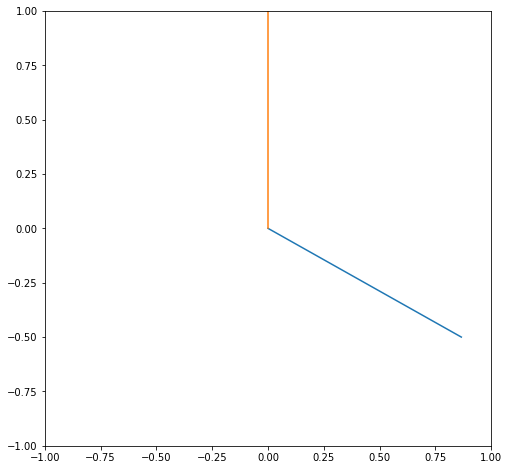

In [24]:
# 绘制倒易空间的基矢
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.plot([0, b1[0]], [0, b1[1]])
plt.plot([0, b2[0]], [0, b2[1]])
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.show()